In [ ]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [ ]:
data = pd.read_csv("data.csv")
print("data.shape = {} rows, {} cols".format(*data.shape))
data.head(n=2)

data.shape = 3862 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
colums = ['TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']
X = data[colums]
y = data['isFraud']

In [ ]:
x_train, x_valid = train_test_split(
    X, train_size=0.7, shuffle=True, random_state=1,
)
y_train, y_valid = train_test_split(
    y, train_size=0.7, shuffle=True, random_state=1,
)

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1])
print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 1.0, Valid-score: 0.6827


In [ ]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (8, 8)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

In [ ]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=1),
    param_range=range(15,25,1),
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

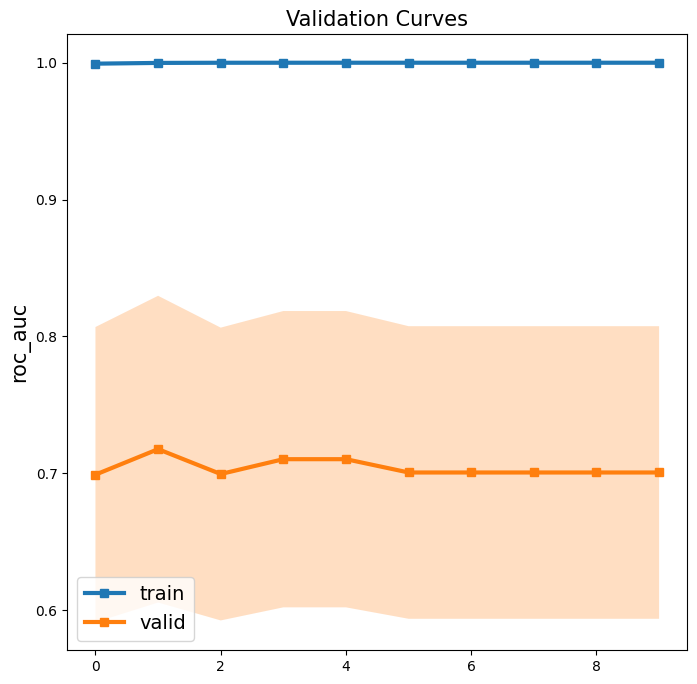

In [ ]:
plot_validation_curves(
    train_scores, valid_scores
)

In [ ]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth = 16, random_state=1),
    param_range=range(0,100,5),
    param_name="min_samples_leaf",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

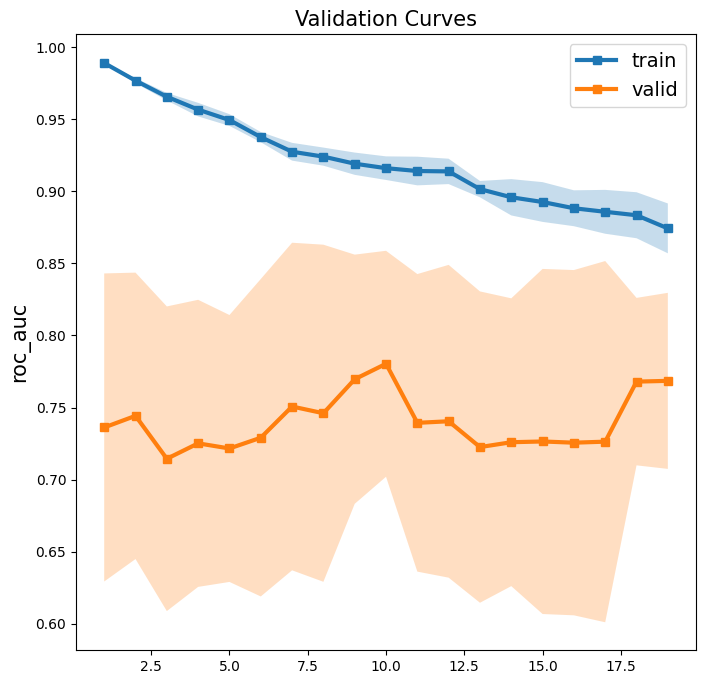

In [ ]:
plot_validation_curves(
    train_scores, valid_scores
)

In [ ]:
train_size, train_scores, valid_scores = learning_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=16, min_samples_leaf=50, random_state=1),
    scoring="roc_auc",
    n_jobs=-1,
    cv=5
)

Text(0, 0.5, 'roc-auc')

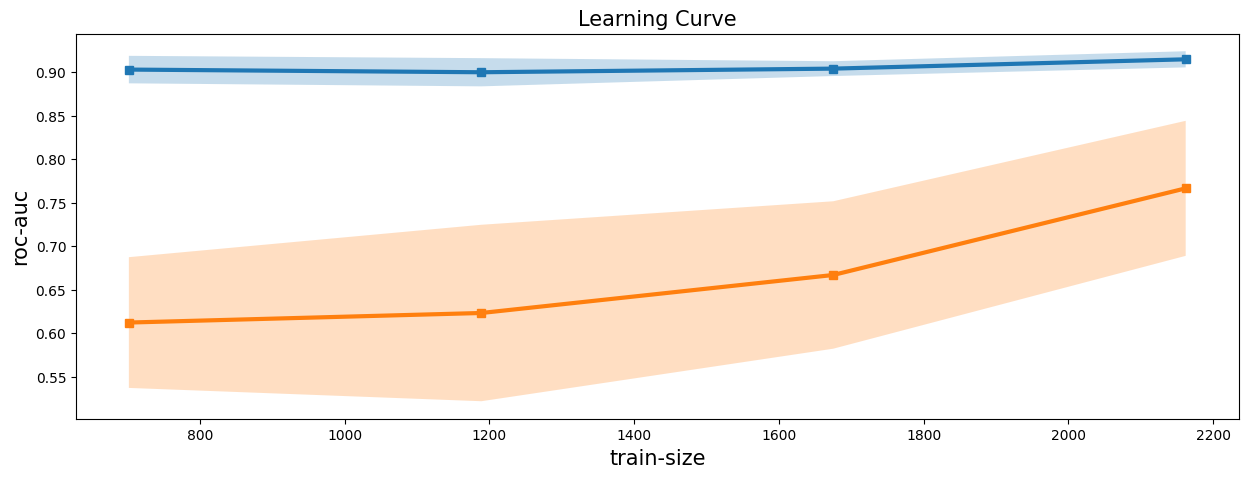

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_size, np.mean(train_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
    y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
    alpha=0.25
)
plt.plot(train_size, np.mean(valid_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
    y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
    alpha=0.25
)
plt.title("Learning Curve", size=15)
plt.xlabel("train-size", size=15)
plt.ylabel("roc-auc", size=15)

In [ ]:
model = DecisionTreeClassifier(max_depth=16,min_samples_leaf=50, random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=50, random_state=1)

In [ ]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1])
print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 0.916, Valid-score: 0.7239
